# Open Field Analyses
### This notebook illustrates all the necessary open field methods and plots.
### last edit: alexg 8/12/20

In [1]:
%matplotlib inline
from types import SimpleNamespace
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from TreeMazeAnalyses2.Analyses.subject_info import SubjectInfo, SubjectSessionInfo
import TreeMazeAnalyses2.Analyses.open_field_functions as of_funcs

from importlib import reload

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

### get information about subject

In [4]:
subject_id = 'Li'
subject_info = SubjectInfo(subject_id, overwrite=True)
#subject_info = SubjectInfo(subject_id)

In [5]:
print(subject_info.sessions)

['Li_T3g_052818', 'Li_OF_052818', 'Li_T3g_052918', 'Li_OF_052918', 'Li_OF_053018', 'Li_T3g_053018', 'Li_OF_053118', 'Li_T3g_053118', 'Li_T3g_060118', 'Li_OF_060118', 'Li_T3g_060418', 'Li_OF_060418', 'Li_T3i_060518', 'Li_OF_060518', 'Li_T3i_060618', 'Li_OF_060718', 'Li_T3i_060818', 'Li_OF_060818', 'Li_OF_061118', 'Li_T3i_061118', 'Li_OF_061218', 'Li_T3i_061218', 'Li_T3i_061218_0001', 'Li_OF_061318', 'Li_T3g_061318', 'Li_T3g_061418', 'Li_OF_061418', 'Li_OF_061518', 'Li_T3g_061518', 'Li_OF_061818', 'Li_T3g_061818', 'Li_OF_062018', 'Li_T3g_062018', 'Li_T3g_062518', 'Li_OF_062518', 'Li_T3g_062618', 'Li_OF_062618', 'Li_T3g_062718', 'Li_OF_062718', 'Li_T3g_062818', 'Li_OF_062818', 'Li_OF_062918', 'Li_T3g_062918', 'Li_OF_070218', 'Li_T3g_070218', 'Li_T3g_070518', 'Li_T3g_070518_0001', 'Li_T3g_070618', 'Li_OF_070618', 'Li_T3g_070918', 'Li_OF_071018', 'Li_T3g_071018', 'Li_T3g_071118', 'Li_T3g_072518', 'Li_T3g_072618', 'Li_T3g_073018', 'Li_T3g_080118', 'Li_OF_080118', 'Li_T3g_080218', 'Li_OF_0802

In [6]:
subject_info.sort_tables['summary']

,n_tt,n_tt_sorted,n_tt_curated,n_valid_clusters,n_cell,n_mua,n_noise,n_unsorted
Li_T3g_052818,16,3,0,NaN,0,0,0,50
Li_OF_052818,16,7,7,NaN,3,11,110,18
Li_T3g_052918,16,10,0,NaN,0,0,0,153
Li_OF_052918,16,10,10,NaN,16,13,136,0
Li_OF_053018,16,11,10,NaN,12,28,125,17
Li_T3g_053018,16,11,0,NaN,0,0,0,156
Li_OF_053118,16,9,8,NaN,8,15,115,4
Li_T3g_053118,16,12,0,NaN,0,0,0,184
Li_T3g_060118,16,11,0,NaN,0,0,0,161
Li_OF_060118,16,10,9,NaN,8,13,133,7


### get session specific information and data

In [8]:
session = 'Li_OF_061218'
session_info = SubjectSessionInfo(subject_id,session)
track_params = SimpleNamespace(**session_info.task_params)
session_info.print_task_params()

number of units in session 32

Task/track and analysis parameters. 

  -> time_step: 0.02
  -> x_pix_lims: [100, 650]
  -> y_pix_lims: [100, 500]
  -> x_pix_bias: -380
  -> y_pix_bias: -280
  -> vt_rate: 0.016666666666666666
  -> xy_pix_rot_rad: 1.6507963267948966
  -> x_pix_mm: 3.7790697674418605
  -> y_pix_mm: 3.265765765765766
  -> x_mm_bias: 0
  -> y_mm_bias: 650
  -> x_mm_lims: [-630, 630]
  -> y_mm_lims: [-60, 1350]
  -> x_cm_lims: [-63, 63]
  -> y_cm_lims: [-6, 135]
  -> mm_bin: 30
  -> cm_bin: 3
  -> max_speed_thr: 100
  -> min_speed_thr: 0.5
  -> rad_bin: 0.17453292519943295
  -> occ_num_thr: 3
  -> occ_time_thr: 0.06
  -> sp_bin: 2
  -> spatial_sigma: 2
  -> spatial_window_size: 5
  -> temporal_window_size: 7
  -> temporal_angle_window_size: 7
  -> temporal_window_type: hann
  -> alpha: 0.02
  -> n_perm: 100


In [9]:
print(session_info)


Session Information for subject Li, session Li_OF_061218
Number of curated units: 32
Methods listed below can be executed with get_{method}(), eg. get_spikes():
 -> track_data. Executed = True
 -> time. Executed = True
 -> spikes. Executed = True
 -> binned_spikes. Executed = True
 -> fr. Executed = True
 -> spike_maps. Executed = True
 -> fr_maps. Executed = True
 -> scores. Executed = False
 -> lnp_scores. Executed = False

To run all analyses use run_analyses().



In [12]:
of_track_dat = session_info.get_track_data()
print(list(of_track_dat.keys()))
of_track_dat = SimpleNamespace(**of_track_dat)

['t', 'x', 'y', 'sp', 'ha', 'hd', 'pos_map_counts', 'pos_map_secs', 'vert_edges', 'horiz_edges', 'n_vert_bins', 'n_horiz_bins', 'ha_stats', 'hd_stats']


#### plot a segment of track data

In [21]:
def plot_trajectory(window_num, window_length):
    time_step = session_info.params['time_step']
    fig,ax = plt.subplots(figsize=(5,5))
    
    sl = np.arange(window_length)+window_num*window_length
    ax.plot(of_track_dat.x[sl],of_track_dat.y[sl],linewidth=2)
    ax.plot(of_track_dat.x,of_track_dat.y,linewidth=1, alpha=0.1, color='k')
    ax.scatter(of_track_dat.x[sl][0],of_track_dat.y[sl][0], 50, color='g')
    ax.scatter(of_track_dat.x[sl][-1],of_track_dat.y[sl][-1], 50, color='r')
    
    ax.axis('square')
    ax.set_xlim(np.array(track_params.x_cm_lims)*1.01)
    ax.set_ylim(np.array(track_params.y_cm_lims)*1.01)
    ax.set_title(f'Trajectory {window_length*time_step}s')
    
    ax.set_xlabel('x position [cm]')
    ax.set_ylabel('y position [cm]')
    return

In [23]:
max_win = len(of_track_dat.t)
win_length = 250
slider = widgets.IntSlider(min=0,max=max_win//win_length,step=1,value=10)
_=interact(plot_trajectory, window_num=slider, window_length=fixed(win_length))

interactive(children=(IntSlider(value=10, description='window_num', max=144), Output()), _dom_classes=('widget…

Text(0.5, 1.0, 'Subject Occupation Time')

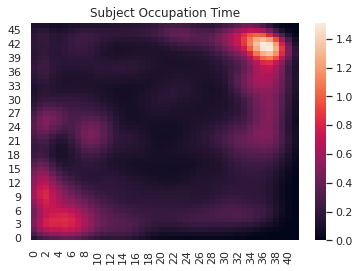

In [10]:
ax=sns.heatmap(of_track_dat.pos_map_secs)
ax.invert_yaxis()
ax.set_title('Subject Occupation Time')

### Get spike data

In [24]:
spks,_,_ = session_info.get_spikes()
bs = session_info.get_binned_spikes()
fr = session_info.get_fr()
t_rs = session_info.get_time()
spike_maps = session_info.get_spike_maps(overwrite=True)
fr_maps = session_info.get_fr_maps(overwrite=True)

Open Field Spike Maps not Found or Overwrite= True, creating them.
Open Field Firing Rate Maps not Found or Overwrite= True, creating them.


(32, 36095)

In [53]:
sp_bin_step = 3
sp_bins = np.arange(0,100,sp_bin_step)
#counts, _ = np.histogram(of_track_dat.sp, bins=sp_bins)
sp_ids = np.digitize(of_track_dat.sp, bins=sp_bins)

centered_sp_bins = sp_bins[sp_ids-1]+sp_bin_step/2
fr_sp = np.zeros( (session_info.n_units, len(sp_bins) ) )
for unit in range(session_info.n_units):
    for i, b in enumerate(sp_bins):
        fr_sp[unit,i] = np.nanmedian(fr[unit][sp_ids==b])

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [60]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(of_track_dat.sp, fr[1])
print(p_value)

7.87084631934031e-108


In [62]:
std_err

0.0024791314142461923

(0.0, 20.0)

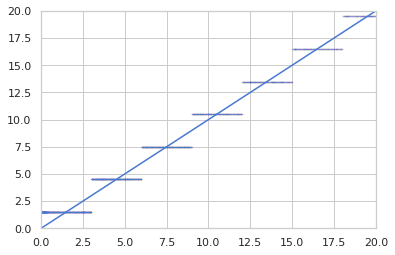

In [52]:
plt.scatter(of_track_dat.sp, sp_bins[sp_ids-1]+1.5, 3, alpha=0.005)
plt.plot([0,100],[0,100])
plt.xlim([0,20])
plt.ylim([0,20])

In [14]:
spike_maps = session_info.get_spike_maps(overwrite=True)
fr_maps = session_info.get_fr_maps(overwrite=True)

Open Field Spike Maps not Found or Overwrite= True, creating them.
Open Field Firing Rate Maps not Found or Overwrite= True, creating them.


In [15]:
of_funcs = reload(of_funcs)
fr_maps2 = of_funcs.get_session_fr_maps2(session_info)

In [16]:
def plot_fr_methods(unit):
    fig,ax = plt.subplots(1,2, figsize=(12,6))
    sns.heatmap(fr_maps[unit],ax = ax[0], cmap='viridis', cbar_kws={'label':'fr [spk/s]'})
    ax[0].invert_yaxis()
    ax[0].set_title('traditional')

    sns.heatmap(fr_maps2[unit],ax = ax[1], cmap='viridis',  cbar_kws={'label':'fr [spk/s]'})
    ax[1].invert_yaxis()
    ax[1].set_title('conserving temp. relation')

In [17]:
interact(plot_fr_methods,unit=widgets.IntSlider(min=0,max=session_info.n_units-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='unit', max=31), Output()), _dom_classes=('widget-interac…

<function __main__.plot_fr_methods(unit)>

### example of non analyzed session

In [19]:
session = 'Li_OF_060818'
session_info = SubjectSessionInfo(subject_id,session)

number of units in session 22


In [20]:
clusters = SimpleNamespace(**session_info.clusters)
print(f'number of units in session {clusters.n_cell + clusters.n_mua}')

number of units in session 22


In [21]:
fr = session_info.get_fr()
fr_maps = session_info.get_fr_maps()
of_track_data = session_info.get_track_data()
fr_maps2 = of_funcs.get_session_fr_maps2(session_info)

In [22]:
interact(plot_fr_methods,unit=widgets.IntSlider(min=0,max=session_info.n_units,step=1,value=0))

interactive(children=(IntSlider(value=0, description='unit', max=22), Output()), _dom_classes=('widget-interac…

<function __main__.plot_fr_methods(unit)>